# Time Series con Pandas

In [2]:
import pandas as pd
import numpy as np

### 1. Dates y Times em Python

La libreria básica para tratar fechas es datetime:

In [3]:
from datetime import datetime
datetime(year = 2024, month = 4, day = 1)

datetime.datetime(2024, 4, 1, 0, 0)

La libreria ``dateutil`` es muy útil para transformar fechas en cualquier formato

In [4]:
# https://dateutil.readthedocs.io/en/stable/parser.html#functions
from dateutil import parser
print(parser.parse("1st of April, 2024"))
print(parser.parse("04/01/2024")) # Primero mes, luego día
print(parser.parse("01/04/2024")) 
print(parser.parse("01/04/2024", dayfirst=True)) 

2024-04-01 00:00:00
2024-04-01 00:00:00
2024-01-04 00:00:00
2024-04-01 00:00:00


In [5]:
print(parser.parse("1/4/2024"))
print(parser.parse("01-04-2024"))
print(parser.parse("2024-01-04"))

2024-01-04 00:00:00
2024-01-04 00:00:00
2024-01-04 00:00:00


In [6]:
print(parser.parse("4/13/2024"))
print(parser.parse("13/04/2024"))
print(parser.parse("Monday 1st of April, 2024"))

2024-04-13 00:00:00
2024-04-13 00:00:00
2024-04-01 00:00:00


Con el método strftime, puedes mostrar cualquier elemento de la fecha

In [7]:
# https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior
datetime(year = 2024, month = 4, day = 1).strftime('%A')

'Monday'

### 2. Dates and Times in numpy

In [8]:
import numpy as np
date = np.array('2024-04-01', dtype = np.datetime64)
date

array('2024-04-01', dtype='datetime64[D]')

In [9]:
# Dtype np.datetime54 es más exquisito con el formato
np.array('01/04/2024', dtype = np.datetime64)

ValueError: Cannot create a NumPy datetime other than NaT with generic units

Once we have this date formatted, however, we can quickly do vectorized operations on it:

In [ ]:
np.arange(12)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [ ]:
# Podemos sumar de forma natural
date + np.arange(12)

array(['2024-04-01', '2024-04-02', '2024-04-03', '2024-04-04',
       '2024-04-05', '2024-04-06', '2024-04-07', '2024-04-08',
       '2024-04-09', '2024-04-10', '2024-04-11', '2024-04-12'],
      dtype='datetime64[D]')

Here is a minute-based datetime:

In [ ]:
np.datetime64('2024-04-01 18:30')

numpy.datetime64('2024-04-01T18:30')

Por defecto, utiliza el huso horario de la computadora. 

No obstante, se puede dar el formato que desees

The following table, drawn from the [NumPy datetime64 documentation](http://docs.scipy.org/doc/numpy/reference/arrays.datetime.html), lists the available format codes along with the relative and absolute timespans that they can encode:

|Code    | Meaning     | Time span (relative) | Time span (absolute)   |
|--------|-------------|----------------------|------------------------|
| ``Y``  | Year	       | ± 9.2e18 years       | [9.2e18 BC, 9.2e18 AD] |
| ``M``  | Month       | ± 7.6e17 years       | [7.6e17 BC, 7.6e17 AD] |
| ``W``  | Week	       | ± 1.7e17 years       | [1.7e17 BC, 1.7e17 AD] |
| ``D``  | Day         | ± 2.5e16 years       | [2.5e16 BC, 2.5e16 AD] |
| ``h``  | Hour        | ± 1.0e15 years       | [1.0e15 BC, 1.0e15 AD] |
| ``m``  | Minute      | ± 1.7e13 years       | [1.7e13 BC, 1.7e13 AD] |
| ``s``  | Second      | ± 2.9e12 years       | [ 2.9e9 BC, 2.9e9 AD]  |
| ``ms`` | Millisecond | ± 2.9e9 years        | [ 2.9e6 BC, 2.9e6 AD]  |
| ``us`` | Microsecond | ± 2.9e6 years        | [290301 BC, 294241 AD] |
| ``ns`` | Nanosecond  | ± 292 years          | [ 1678 AD, 2262 AD]    |
| ``ps`` | Picosecond  | ± 106 days           | [ 1969 AD, 1970 AD]    |
| ``fs`` | Femtosecond | ± 2.6 hours          | [ 1969 AD, 1970 AD]    |
| ``as`` | Attosecond  | ± 9.2 seconds        | [ 1969 AD, 1970 AD]    |

### 3. Dates and Times in Pandas

#### Default arguments

In [ ]:
df = pd.DataFrame({'date': ['3/10/2000', '3/11/2000', '3/12/2000'],
                   'value': [2, 3, 4]})
df

,date,value
0,3/10/2000,2
1,3/11/2000,3
2,3/12/2000,4


In [ ]:
df.dtypes

date     object
value     int64
dtype: object

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df

,date,value
0,2000-03-10,2
1,2000-03-11,3
2,2000-03-12,4


In [ ]:
df.dtypes

date     datetime64[ns]
value             int64
dtype: object

#### Con el día primero

In [ ]:
df = pd.DataFrame({'date': ['3/10/2000', '3/11/2000', '3/12/2000'],
                   'value': [2, 3, 4]})

df['date'] = pd.to_datetime(df['date'], dayfirst=True)
df

,date,value
0,2000-10-03,2
1,2000-11-03,3
2,2000-12-03,4


#### Podemos usar el formato que nosotros deseemos

In [ ]:
df = pd.DataFrame({'date': ['2016-6-10 20:30:0', 
                            '2016-7-1 19:45:30', 
                            '2013-10-12 4:5:1'],
                   'value': [2, 3, 4]})

df['date'] = pd.to_datetime(df['date'], format="%Y-%m-%d %H:%M:%S")
df

,date,value
0,2016-06-10 20:30:00,2
1,2016-07-01 19:45:30,3
2,2013-10-12 04:05:01,4


#### Tratamiento de errores

In [ ]:
df = pd.DataFrame({'date': ['3/10/2000', 'a/11/2000', '3/12/2000'],
                   'value': [2, 3, 4]})

df['date'] = pd.to_datetime(df['date'])

ValueError: time data "a/11/2000" doesn't match format "%m/%d/%Y", at position 1. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [ ]:
# ignore: no hacer nada
df = pd.DataFrame({'date': ['3/10/2000', 'a/11/2000', '3/12/2000'],
                   'value': [2, 3, 4]})

df['date'] = pd.to_datetime(df['date'], errors = 'ignore')
df

C:\Users\jonat\AppData\Local\Temp\ipykernel_26120\1367656756.py:5: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  df['date'] = pd.to_datetime(df['date'], errors = 'ignore')


,date,value
0,3/10/2000,2
1,a/11/2000,3
2,3/12/2000,4


In [ ]:
df.dtypes

date     object
value     int64
dtype: object

In [ ]:
# coerce: imponer la transformación a fechas, sustituyendo inválidas por NaT
df = pd.DataFrame({'date': ['3/10/2000', 'a/11/2000', '3/12/2000'],
                   'value': [2, 3, 4]})

df['date'] = pd.to_datetime(df['date'], errors = 'coerce')
df

,date,value
0,2000-03-10,2
1,NaT,3
2,2000-03-12,4


In [ ]:
df.dtypes

date     datetime64[ns]
value             int64
dtype: object

In [ ]:
print(df.loc[0, 'date'])
print(df.loc[1, 'date'])

3/10/2000
a/11/2000


### 4. Assemble a datetime from multiple columns

In [ ]:
df = pd.DataFrame({'year': [2015, 2016],
                   'month': [2, 3],
                   'day': [4, 5]})

df

,year,month,day
0,2015,2,4
1,2016,3,5


In [ ]:
df['date'] = pd.to_datetime(df)

In [ ]:
df

,year,month,day,date
0,2015,2,4,2015-02-04
1,2016,3,5,2016-03-05


In [ ]:
df.dtypes

year              int64
month             int64
day               int64
date     datetime64[ns]
dtype: object

### 5. Obtener año, mes, día...

In [ ]:
df = pd.DataFrame({'name': ['Anna', 'Andy', 'Lucas', 'Irene'],
                 'DoB': ['01-01-2010', '04-28-1996', '01-01-2024', '01-04-2010']})

df['DoB'] = pd.to_datetime(df['DoB'])
df

,name,DoB
0,Anna,2010-01-01
1,Andy,1996-04-28
2,Lucas,2024-01-01
3,Irene,2010-01-04


In [ ]:
df['year'] = df['DoB'].apply(lambda x: x.year)
df['month'] = df['DoB'].apply(lambda x: x.month)
df['day'] = df['DoB'].apply(lambda x: x.day)
df

,name,DoB,year,month,day
0,Anna,2010-01-01,2010,1,1
1,Andy,1996-04-28,1996,4,28
2,Lucas,2024-01-01,2024,1,1
3,Irene,2010-01-04,2010,1,4


In [ ]:
df['year_2'] = df['DoB'].dt.year
df['month_2'] = df['DoB'].dt.month
df['day_2'] = df['DoB'].dt.day
df

,name,DoB,year,month,day,year_2,month_2,day_2
0,Anna,2010-01-01,2010,1,1,2010,1,1
1,Andy,1996-04-28,1996,4,28,1996,4,28
2,Lucas,2024-01-01,2024,1,1,2024,1,1
3,Irene,2010-01-04,2010,1,4,2010,1,4


In [ ]:
df.dtypes

name               object
DoB        datetime64[ns]
year                int64
month               int64
day                 int64
year_2              int32
month_2             int32
day_"               int32
day_2               int32
dtype: object

### 6. La semaña del año, años bisiestos

In [ ]:
# Cuidado con la semana! Empieza a contar desde el primer lunes del año!
# 2010 vs 2024
df['week_of_year'] = df['DoB'].dt.isocalendar().week
df['day_of_week'] = df['DoB'].dt.dayofweek
df['is_leap_year'] = df['DoB'].dt.is_leap_year
df

,name,DoB,year,month,day,year_2,month_2,day_2,week_of_year,day_of_week,is_leap_year
0,Anna,2010-01-01,2010,1,1,2010,1,1,53,4,False
1,Andy,1996-04-28,1996,4,28,1996,4,28,17,6,True
2,Lucas,2024-01-01,2024,1,1,2024,1,1,1,0,True
3,Irene,2010-01-04,2010,1,4,2010,1,4,1,0,False


In [ ]:
dw_mapping={
    0: 'Monday', 
    1: 'Tuesday', 
    2: 'Wednesday', 
    3: 'Thursday', 
    4: 'Friday',
    5: 'Saturday', 
    6: 'Sunday'
} 

dw_mapping_es={
    0: 'Lunes', 
    1: 'Martes', 
    2: 'Miércoles', 
    3: 'Jueves', 
    4: 'Viernes',
    5: 'Sábado', 
    6: 'Domingo'
} 
df['day_of_week_name']=df['DoB'].dt.weekday.map(dw_mapping)
df['day_of_week_name_2']=df['DoB'].dt.strftime('%A')
df['dia_senaba']=df['DoB'].dt.weekday.map(dw_mapping_es)
df

,name,DoB,year,month,day,year_2,month_2,day_2,week_of_year,day_of_week,is_leap_year,day_of_week_name,day_of_week_name_2,dia_senaba
0,Anna,2010-01-01,2010,1,1,2010,1,1,53,4,False,Friday,Friday,Viernes
1,Andy,1996-04-28,1996,4,28,1996,4,28,17,6,True,Sunday,Sunday,Domingo
2,Lucas,2024-01-01,2024,1,1,2024,1,1,1,0,True,Monday,Monday,Lunes
3,Irene,2010-01-04,2010,1,4,2010,1,4,1,0,False,Monday,Monday,Lunes


### 7. Fecha y día actuales

In [ ]:
pd.to_datetime('today')

Timestamp('2024-03-31 14:23:09.599122')

In [ ]:
datetime.today()

datetime.datetime(2024, 3, 31, 14, 23, 11, 654514)

In [ ]:
today = pd.to_datetime('today')
df['age'] = today.year - df['DoB'].dt.year

df

,name,DoB,year,month,day,year_2,month_2,day_2,week_of_year,day_of_week,is_leap_year,day_of_week_name,day_of_week_name_2,dia_senaba,age
0,Anna,2010-01-01,2010,1,1,2010,1,1,53,4,False,Friday,Friday,Viernes,14
1,Andy,1996-04-28,1996,4,28,1996,4,28,17,6,True,Sunday,Sunday,Domingo,28
2,Lucas,2024-01-01,2024,1,1,2024,1,1,1,0,True,Monday,Monday,Lunes,0
3,Irene,2010-01-04,2010,1,4,2010,1,4,1,0,False,Monday,Monday,Lunes,14


### 8. pd.read_csv: leer en formato fechas

In [ ]:
df = pd.read_csv('data/city_sales.csv', parse_dates = ['date'])
df

,date,num,city
0,2015-01-01 09:00:00,4,London
1,2015-01-01 09:01:00,4,London
2,2015-01-01 09:02:00,3,London
3,2015-01-01 09:03:00,3,London
4,2015-01-01 09:04:00,3,London
...,...,...,...
1795139,2019-01-31 15:56:00,3,Cambridge
1795140,2019-01-31 15:57:00,3,Cambridge
1795141,2019-01-31 15:58:00,3,Cambridge
1795142,2019-01-31 15:59:00,3,Cambridge


In [ ]:
df.describe(include='all')

,date,num,city
count,1795144,1.795144e+06,1795144
unique,NaN,NaN,4
top,NaN,NaN,London
freq,NaN,NaN,448786
mean,2017-01-16 10:05:27.579737344,2.801503e+00,NaN
min,2015-01-01 09:00:00,1.000000e+00,NaN
25%,2016-01-08 12:30:00,2.000000e+00,NaN
50%,2017-01-17 00:30:00,3.000000e+00,NaN
75%,2018-01-24 12:30:00,3.000000e+00,NaN
max,2019-01-31 16:00:00,4.000000e+00,NaN


In [ ]:
df.dtypes

date    datetime64[ns]
num              int64
city            object
dtype: object

### Cuando se trata de fechas, si es común utilizarlas como índices para mejorar la performance

In [ ]:
df = pd.read_csv('data/city_sales.csv', parse_dates = ['date'])
df.set_index(['date'], inplace=True)
df.head()

,num,city
date,,
2015-01-01 09:00:00,4,London
2015-01-01 09:01:00,4,London
2015-01-01 09:02:00,3,London
2015-01-01 09:03:00,3,London
2015-01-01 09:04:00,3,London


In [ ]:
df = pd.read_csv('data/city_sales.csv', parse_dates = ['date'], index_col = 'date')
df.head()

,num,city
date,,
2015-01-01 09:00:00,4,London
2015-01-01 09:01:00,4,London
2015-01-01 09:02:00,3,London
2015-01-01 09:03:00,3,London
2015-01-01 09:04:00,3,London


In [ ]:
# Tenemos un DateTimeIndex
df.index

DatetimeIndex(['2015-01-01 09:00:00', '2015-01-01 09:01:00',
               '2015-01-01 09:02:00', '2015-01-01 09:03:00',
               '2015-01-01 09:04:00', '2015-01-01 09:05:00',
               '2015-01-01 09:06:00', '2015-01-01 09:07:00',
               '2015-01-01 09:08:00', '2015-01-01 09:09:00',
               ...
               '2019-01-31 15:51:00', '2019-01-31 15:52:00',
               '2019-01-31 15:53:00', '2019-01-31 15:54:00',
               '2019-01-31 15:55:00', '2019-01-31 15:56:00',
               '2019-01-31 15:57:00', '2019-01-31 15:58:00',
               '2019-01-31 15:59:00', '2019-01-31 16:00:00'],
              dtype='datetime64[ns]', name='date', length=1795144, freq=None)

### pd.to_datetime es flexible a la hora de parsear los formatos

In [ ]:
dates = pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015',
                       '2015-Jul-6', '07-07-2015', '20150708'])
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

### 9. Usar fechas como índices tiene sus ventajas a la hora de realizar selecciones

In [ ]:
df = pd.read_csv('data/city_sales.csv', parse_dates = ['date'], index_col = 'date')
# Seleccion más sencilla
df.loc['2018']

,num,city
date,,
2018-01-01 09:00:00,2,London
2018-01-01 09:01:00,1,London
2018-01-01 09:02:00,3,London
2018-01-01 09:03:00,3,London
2018-01-01 09:04:00,3,London
...,...,...
2018-12-31 15:56:00,4,Cambridge
2018-12-31 15:57:00,2,Cambridge
2018-12-31 15:58:00,3,Cambridge


In [ ]:
# Usando máscaras es algo más engorroso
df[df.index.year == 2018]

,num,city
date,,
2018-01-01 09:00:00,2,London
2018-01-01 09:01:00,1,London
2018-01-01 09:02:00,3,London
2018-01-01 09:03:00,3,London
2018-01-01 09:04:00,3,London
...,...,...
2018-12-31 15:56:00,4,Cambridge
2018-12-31 15:57:00,2,Cambridge
2018-12-31 15:58:00,3,Cambridge


In [ ]:
df.loc['2018-01']

,num,city
date,,
2018-01-01 09:00:00,2,London
2018-01-01 09:01:00,1,London
2018-01-01 09:02:00,3,London
2018-01-01 09:03:00,3,London
2018-01-01 09:04:00,3,London
...,...,...
2018-01-31 15:56:00,2,Cambridge
2018-01-31 15:57:00,3,Cambridge
2018-01-31 15:58:00,3,Cambridge


In [ ]:
df.loc['2018-5-1'].head()

,num,city
date,,
2018-05-01 09:00:00,1,London
2018-05-01 09:01:00,4,London
2018-05-01 09:02:00,3,London
2018-05-01 09:03:00,2,London
2018-05-01 09:04:00,3,London


In [ ]:
df.loc['2018'].groupby('city').sum()

,num
city,
Cambridge,308428
Durham,307965
London,307431
Oxford,307366


### 11. Seleccionar fechas entre dos valores

In [ ]:
# Hay que asegurarse de que el índice está ordenado
df.sort_index().loc['2016':'2018']
# Da error!
#df.loc['2016':'2018']

,num,city
date,,
2016-01-01 09:00:00,3,Cambridge
2016-01-01 09:00:00,4,London
2016-01-01 09:00:00,3,Durham
2016-01-01 09:00:00,3,Oxford
2016-01-01 09:01:00,2,Oxford
...,...,...
2018-12-31 15:59:00,2,Oxford
2018-12-31 16:00:00,2,Durham
2018-12-31 16:00:00,3,Oxford


In [ ]:
df = df.sort_index()

In [ ]:
df.loc['2018-5-2 10:30' : '2018-5-2 10:45' ]

,num,city
date,,
2018-05-02 10:30:00,3,London
2018-05-02 10:30:00,3,Oxford
2018-05-02 10:30:00,2,Durham
2018-05-02 10:30:00,3,Cambridge
2018-05-02 10:31:00,2,Durham
...,...,...
2018-05-02 10:44:00,3,Cambridge
2018-05-02 10:45:00,4,London
2018-05-02 10:45:00,3,Durham


In [ ]:
df.between_time('10:30','10:45')

,num,city
date,,
2015-01-01 10:30:00,4,London
2015-01-01 10:30:00,4,Cambridge
2015-01-01 10:30:00,4,Oxford
2015-01-01 10:30:00,2,Durham
2015-01-01 10:31:00,3,London
...,...,...
2019-01-31 10:44:00,2,London
2019-01-31 10:45:00,4,London
2019-01-31 10:45:00,4,Cambridge


### 12. Operaaciones con Fechas

In [10]:
df = pd.DataFrame({'name': ['Tom', 'Andy', 'Lucas'],
                 'DoB': ['08-05-1997', '04-28-1996', '12-16-1995']})

df['DoB'] = pd.to_datetime(df['DoB'])
df

,name,DoB
0,Tom,1997-08-05
1,Andy,1996-04-28
2,Lucas,1995-12-16


In [11]:
from pandas.tseries.offsets import DateOffset, BDay
# Sumar o restar 
print(df['DoB'] + DateOffset(days = 5))
print(df['DoB'] + DateOffset(days = -5))
print(df['DoB'] + DateOffset(months = 5))

0   1997-08-10
1   1996-05-03
2   1995-12-21
Name: DoB, dtype: datetime64[ns]
0   1997-07-31
1   1996-04-23
2   1995-12-11
Name: DoB, dtype: datetime64[ns]
0   1998-01-05
1   1996-09-28
2   1996-05-16
Name: DoB, dtype: datetime64[ns]


In [ ]:
# Otra forma
from datetime import timedelta
print(df['DoB'] + timedelta(days = 5))
print(df['DoB'] + timedelta(days = -5))
print(df['DoB'] + timedelta(months = 5))

0   1997-08-10
1   1996-05-03
2   1995-12-21
Name: DoB, dtype: datetime64[ns]
0   1997-07-31
1   1996-04-23
2   1995-12-11
Name: DoB, dtype: datetime64[ns]


TypeError: 'months' is an invalid keyword argument for __new__()

In [ ]:
# BusinessDays: excluir sábados y domingos
BDay(10)

<10 * BusinessDays>

In [ ]:
print(df['DoB'])
print(df['DoB'] + BDay(10))

0   1997-08-05
1   1996-04-28
2   1995-12-16
Name: DoB, dtype: datetime64[ns]
0   1997-08-19
1   1996-05-10
2   1995-12-29
Name: DoB, dtype: datetime64[ns]


### 13. Regular sequences: ``pd.date_range()``

``pd.date_range()``  es similar al ya conocido ``range`` o ``np.arange``

Utiliza argumentos como:
* fecha inicial
* fecha final
* periodos
* frecuencia

In [ ]:
# Fecha final se incluye!!
pd.date_range('2015-07-03', '2015-07-10')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

Usando el número de periodos total

In [ ]:
pd.date_range('2015-07-03', periods = 8)

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

Frecuencia: diaria, mensual, horas, segundos...

In [ ]:
pd.date_range('2015-01-01', periods = 12, freq='M')

DatetimeIndex(['2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
               '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31',
               '2015-09-30', '2015-10-31', '2015-11-30', '2015-12-31'],
              dtype='datetime64[ns]', freq='M')

In [ ]:
pd.date_range('2015-01-01', periods = 12, freq='s')

DatetimeIndex(['2015-01-01 00:00:00', '2015-01-01 00:00:01',
               '2015-01-01 00:00:02', '2015-01-01 00:00:03',
               '2015-01-01 00:00:04', '2015-01-01 00:00:05',
               '2015-01-01 00:00:06', '2015-01-01 00:00:07',
               '2015-01-01 00:00:08', '2015-01-01 00:00:09',
               '2015-01-01 00:00:10', '2015-01-01 00:00:11'],
              dtype='datetime64[ns]', freq='s')

In [ ]:
pd.date_range('2015-01-01', periods = 12, freq='h')

DatetimeIndex(['2015-01-01 00:00:00', '2015-01-01 01:00:00',
               '2015-01-01 02:00:00', '2015-01-01 03:00:00',
               '2015-01-01 04:00:00', '2015-01-01 05:00:00',
               '2015-01-01 06:00:00', '2015-01-01 07:00:00',
               '2015-01-01 08:00:00', '2015-01-01 09:00:00',
               '2015-01-01 10:00:00', '2015-01-01 11:00:00'],
              dtype='datetime64[ns]', freq='h')

| Code   | Description         | Code   | Description          |
|--------|---------------------|--------|----------------------|
| ``D``  | Calendar day        | ``B``  | Business day         |
| ``W``  | Weekly              |        |                      |
| ``ME``  | Month end           | ``BME`` | Business month end   |
| ``QE``  | Quarter end         | ``BQE`` | Business quarter end |
| ``YE``  | Year end            | ``BYE`` | Business year end    |
| ``h``  | Hours               | ``bh`` | Business hours       |
| ``min``  | Minutes             |        |                      |
| ``s``  | Seconds             |        |                      |
| ``ms``  | Milliseonds         |        |                      |
| ``us``  | Microseconds        |        |                      |
| ``ns``  | nanoseconds         |        |                      |

In [ ]:
pd.date_range('2024-01-01', periods = 12, freq='ME')

DatetimeIndex(['2024-01-31', '2024-02-29', '2024-03-31', '2024-04-30',
               '2024-05-31', '2024-06-30', '2024-07-31', '2024-08-31',
               '2024-09-30', '2024-10-31', '2024-11-30', '2024-12-31'],
              dtype='datetime64[ns]', freq='ME')

### 14. Operaciones matemáticas interesantes

In [ ]:
# Operar los N anteriores: rolling(3)
df = pd.read_csv('data/city_sales.csv', parse_dates=['date'], index_col='date')
df['rolling_sum'] = df['num'].rolling(3).sum()
df['rolling_mean'] = df['num'].rolling(3).mean()

ValueError: window must be an integer 0 or greater

In [ ]:
df

,num,city,rolling_sum,rolling_mean
date,,,,
2015-01-01 09:00:00,4,London,NaN,NaN
2015-01-01 09:01:00,4,London,NaN,NaN
2015-01-01 09:02:00,3,London,11.0,3.666667
2015-01-01 09:03:00,3,London,10.0,3.333333
2015-01-01 09:04:00,3,London,9.0,3.000000
...,...,...,...,...
2019-01-31 15:56:00,3,Cambridge,7.0,2.333333
2019-01-31 15:57:00,3,Cambridge,7.0,2.333333
2019-01-31 15:58:00,3,Cambridge,9.0,3.000000


In [ ]:
# Sustituir NaN con el primero que aparezca
df['rolling_sum_back'] = df['rolling_sum'].bfill()

In [ ]:
df

,num,city,rolling_sum,rolling_mean,rolling_sum_back
date,,,,,
2015-01-01 09:00:00,4,London,NaN,NaN,11.0
2015-01-01 09:01:00,4,London,NaN,NaN,11.0
2015-01-01 09:02:00,3,London,11.0,3.666667,11.0
2015-01-01 09:03:00,3,London,10.0,3.333333,10.0
2015-01-01 09:04:00,3,London,9.0,3.000000,9.0
...,...,...,...,...,...
2019-01-31 15:56:00,3,Cambridge,7.0,2.333333,7.0
2019-01-31 15:57:00,3,Cambridge,7.0,2.333333,7.0
2019-01-31 15:58:00,3,Cambridge,9.0,3.000000,9.0


In [ ]:
# Creating the dataframe 
df = pd.DataFrame({"A":[12, 4, 5, None, 1],
                   "B":[None, 2, 54, 3, None],
                   "C":[20, 16, None, 3, None],
                   "D":[14, 3, None, None, 6],
                   "E":[14, None, None, None, 6]})
  
# Print the dataframe
df

,A,B,C,D,E
0,12.0,NaN,20.0,14.0,14.0
1,4.0,2.0,16.0,3.0,NaN
2,5.0,54.0,NaN,NaN,NaN
3,NaN,3.0,3.0,NaN,NaN
4,1.0,NaN,NaN,6.0,6.0


In [ ]:
# Sustituir NaN con el anterior que aparezca
df['C_ffill'] = df['C'].ffill()
df

,A,B,C,D,E,C_ffill
0,12.0,NaN,20.0,14.0,14.0,20.0
1,4.0,2.0,16.0,3.0,NaN,16.0
2,5.0,54.0,NaN,NaN,NaN,16.0
3,NaN,3.0,3.0,NaN,NaN,3.0
4,1.0,NaN,NaN,6.0,6.0,3.0


In [ ]:
# Interpolar valores missing. 
# No funciona si falta el primero!!!
# Operación
# Si es el último: le asigna el penúltimo valor. Ejemplo B
# Si está entre medias y solo falta el elemento N: ((N-1) + (N+1))/2. Ejemplo A y C. 
# Para A: (5+1)/2 = 3
# Para C: (16+3)/2 = 9.5
# Si está entre medias y faltan m elementos: la suma del primero que exista antes, el primero que exista después y se calculan los valores intermedios
# Se restan el primero que exista después, el primero que exista antes y se divide entre el valor absoluto de la resta de los indices
# Ejemplo D: existen el 3 y el 6, faltán dos valores, se rellenan a distancias iguales, es decir, 5 y 6. (6-3)/3 = 1. Vamos sumando 1
# Ejemplo E: existen el 14 y el 6, faltán tres valores, se rellenan a distancias iguales, es decir, 12, 10 y 8. Es decir (6-14)/4 = -2. Vamos restando 2 
df.interpolate(method = 'linear')

,A,B,C,D,E
0,12.0,NaN,20.0,14.0,14.0
1,4.0,2.0,16.0,3.0,12.0
2,5.0,54.0,9.5,4.0,10.0
3,3.0,3.0,3.0,5.0,8.0
4,1.0,3.0,8.0,6.0,6.0


In [ ]:
goog = pd.read_csv('data/GOOG.csv')
goog['Date'] =  pd.to_datetime(goog['Date'])
goog.set_index('Date', inplace=True)
goog

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,312.304413,313.579620,310.954468,312.204773,312.204773,3927000
2010-01-05,312.418976,312.747742,309.609497,310.829926,310.829926,6031900
2010-01-06,311.761444,311.761444,302.047852,302.994293,302.994293,7987100
2010-01-07,303.562164,303.861053,295.218445,295.940735,295.940735,12876600
2010-01-08,294.894653,300.498657,293.455048,299.885956,299.885956,9483900
...,...,...,...,...,...,...
2019-12-27,1362.989990,1364.530029,1349.310059,1351.890015,1351.890015,1038400
2019-12-30,1350.000000,1353.000000,1334.020020,1336.140015,1336.140015,1050900
2019-12-31,1330.109985,1338.000000,1329.084961,1337.020020,1337.020020,961800


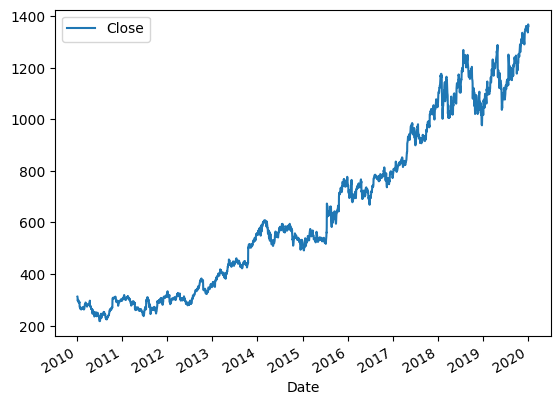

In [ ]:
goog = goog[['Close']]
goog.plot();

| Code   | Description         | Code   | Description          |
|--------|---------------------|--------|----------------------|
| ``D``  | Calendar day        | ``B``  | Business day         |
| ``W``  | Weekly              |        |                      |
| ``ME``  | Month end           | ``BME`` | Business month end   |
| ``QE``  | Quarter end         | ``BQE`` | Business quarter end |
| ``YE``  | Year end            | ``BYE`` | Business year end    |
| ``h``  | Hours               | ``bh`` | Business hours       |
| ``min``  | Minutes             |        |                      |
| ``s``  | Seconds             |        |                      |
| ``ms``  | Milliseonds         |        |                      |
| ``us``  | Microseconds        |        |                      |
| ``ns``  | nanoseconds         |        |                      |

In [ ]:
# resample: 
# Agrupa por años y calcula la media 
goog.resample('YE').mean()

,Close
Date,
2010-12-31,266.811472
2011-12-31,283.424738
2012-12-31,320.208021
2013-12-31,440.470378
2014-12-31,559.803290
2015-12-31,602.005681
2016-12-31,743.486707
2017-12-31,921.780837
2018-12-31,1113.225134


In [ ]:
# Equivalente
goog.loc["2020"].mean()

Close    1364.015015
dtype: float64

In [ ]:
# Simplimente te da el valor del útimo día del año (cuidado si era sábado o domingo!)
goog.asfreq('YE')

,Close
Date,
2010-12-31,295.875977
2011-12-31,NaN
2012-12-31,352.369232
2013-12-31,558.262512
2014-12-31,524.958740
2015-12-31,758.880005
2016-12-31,NaN
2017-12-31,NaN
2018-12-31,1035.609985


In [ ]:
# Simplimente te da el valor del útimo día del año (ni sábado ni domingo)
goog.asfreq('BYE')

,Close
Date,
2010-12-31,295.875977
2011-12-30,321.744019
2012-12-31,352.369232
2013-12-31,558.262512
2014-12-31,524.958740
2015-12-31,758.880005
2016-12-30,771.820007
2017-12-29,1046.400024
2018-12-31,1035.609985


In [ ]:
# Agrupa por semanas  y calcula la media 
goog.resample('W').mean()

,Close
Date,
2010-01-10,304.371137
2010-01-17,293.751941
2010-01-24,286.553421
2010-01-31,267.870953
2010-02-07,265.308551
...,...
2019-12-08,1314.898022
2019-12-15,1346.268018
2019-12-22,1354.908008


In [ ]:
# Muy útil en ML para ver la "tendencia" en los últimos días
goog["close_shift_mas_1"] = goog['Close'].shift(1)
goog["close_shift_menos_1"] = goog['Close'].shift(-1)

C:\Users\jonat\AppData\Local\Temp\ipykernel_26120\268404437.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  goog["close_shift_mas_1"] = goog['Close'].shift(1)
C:\Users\jonat\AppData\Local\Temp\ipykernel_26120\268404437.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  goog["close_shift_menos_1"] = goog['Close'].shift(-1)


In [ ]:
goog

,Close,close_shift_mas_1,close_shift_menos_1
Date,,,
2010-01-04,312.204773,NaN,310.829926
2010-01-05,310.829926,312.204773,302.994293
2010-01-06,302.994293,310.829926,295.940735
2010-01-07,295.940735,302.994293,299.885956
2010-01-08,299.885956,295.940735,299.432648
...,...,...,...
2019-12-27,1351.890015,1360.400024,1336.140015
2019-12-30,1336.140015,1351.890015,1337.020020
2019-12-31,1337.020020,1336.140015,1367.369995
